## 08.12.2023 X-ray tomography and diffraction


We begin by loading the libraries you will require later on for your calculations.

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1

The following cell imports a function to simulate the forward propagation of the X-rays following interaction with an object using the Fresnel propagator. __Please note, that this function test_simulation.py does not fall under the MIT license and may not be shared outside this course.__

Last week, you varied the inputs z01 and z02 (in nm) which relate the the SOD and SDD in the lecture for cone-beam imaging and saw how the propagated image changes. This week, change the material the function simulates to gold and teflon and vary its thickness to see how the propagated image changes. You may also try to use two discs of two different materials as the object. Please modify the function as required.

#### Solution

In [2]:
from test_simulation_adapted import forward_propagation_holo

# check delta and beta for different materials here https://henke.lbl.gov/optical_constants/getdb2.html
# delta and beta for gold at 11 keV
delta_au = 2.42117549E-05
beta_au = 1.56585247E-06
# delta and beta for teflon at 11 keV
delta_tf = 3.638105E-06
beta_tf = 9.52290691E-09  

# use the adapted simulation code to check how the signal looks for both materials at different distances and with different thicknesses
# you have to take care to use the proper units. The code accepts the distances in nm, while the thickness is given in m
z01 = 10 * 1e7   # nm = 10cm
z02_far = 10 * 1e9   # nm = 20m
z02_near = 20 * 1e7   # nm = 20cm
thin = 20e-6 # 20µm
thick = 2e-4 # 200µm

# apply the function with the different inputs. note that we overwrite obj, since we are not currently interested in it
au_far_thick, obj = forward_propagation_holo(z01,z02_far,thick,delta_au,beta_au)
au_far_thin, obj = forward_propagation_holo(z01,z02_far,thin,delta_au,beta_au)
au_near_thin, obj = forward_propagation_holo(z01,z02_near,thin,delta_au,beta_au)

tf_far_thick, obj = forward_propagation_holo(z01,z02_far,thick,delta_tf,beta_tf)
tf_far_thin, obj = forward_propagation_holo(z01,z02_far,thin,delta_tf,beta_tf)
tf_near_thin, obj = forward_propagation_holo(z01,z02_near,thin,delta_tf,beta_tf)

The Fresnel number is 0.0003789203684271891
Transmission is 0.0 %.
The Fresnel number is 0.0003789203684271891
Transmission is 3.0 %.
The Fresnel number is 1.8756558237145857
Transmission is 3.0 %.
The Fresnel number is 0.0003789203684271891
Transmission is 81.0 %.
The Fresnel number is 0.0003789203684271891
Transmission is 98.0 %.
The Fresnel number is 1.8756558237145857
Transmission is 98.0 %.


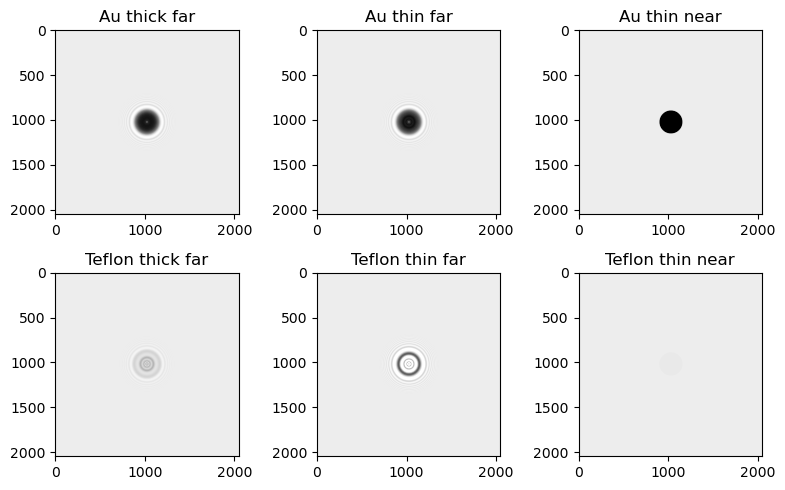

In [3]:
# plot the output
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8, 5))
ax1.imshow(au_far_thick, vmin = 0.1, vmax=1.15, cmap='Greys_r')
ax1.set_title('Au thick far')
ax2.imshow(au_far_thin, vmin = 0.1, vmax=1.15, cmap='Greys_r')
ax2.set_title('Au thin far')
ax3.imshow(au_near_thin, vmin = 0.1, vmax=1.15, cmap='Greys_r')
ax3.set_title('Au thin near')
ax4.imshow(tf_far_thick, vmin = 0.1, vmax=1.15, cmap='Greys_r')
ax4.set_title('Teflon thick far')
ax5.imshow(tf_far_thin, vmin = 0.1, vmax=1.15, cmap='Greys_r')
ax5.set_title('Teflon thin far')
ax6.imshow(tf_near_thin, vmin = 0.1, vmax=1.15, cmap='Greys_r')
ax6.set_title('Teflon thin near')
fig.tight_layout()
plt.show()

In the images that display the thin materials with low SDD (__thin near__), we essentially observe the absorption of the materials, which is low for Teflon but high for Au. If we increase SDD (__thin far__), we see that the phase shift and corresponding interference leads to a strong signal at the detector for both materials. Interestingly, when we now increase the sample thickness (__thick far__), we see no change for gold and the signal seems weaker for Teflon. For gold, this is due an error, as the transmission approaches 0. For Teflon, this is likely due to phase wrapping for the thinner object.

### Exercise 2

A binary Fresnel zone plate has an outer zone width of 50 nm and a depth of 20 times the width, filled with Au, and delivers an absolute phase shift of $k\delta l=\pi$, with $k$ the wave number, $\delta$ the refractive index increment and $l$ the depth of the zone plate. The diameter $D$ of the lens is 100 µm. Determine the wavelength $\lambda$ and the first order focal length $f$. Estimate the depth of focus. Please explain all your assumptions.

Make use of the fact that the real part of the refractive index increment for purely scattering media is $\delta=\frac{2\pi\rho r_0}{k^2}$, where $\rho=4.687$ electrons/Å$^3$ is the electron density of Au and $r_0=2.82\cdot10^{-5}$ Å, is the scattering amplitude per electron. The depth of focus can be estimated as the resolution divided by the aperture of the zone plates, where the aperture is $D/f$.
    
This question was taken from Elements of Modern X‐ray Physics by J. Als-Nielsen and D. McMorrow (Second Edition, Chapter 9, DOI: 10.1002/9781119998365).

#### Solution

Firstly, we will compute the number of zones using $$D=4M\Delta r_M$$ which indicates that $$M=\frac{D}{4\Delta r_M}=500$$

Secondly, we know that the wavelength  $\lambda$ and the first order focal length $f$ relate to the number of zones $M$ and the outer zone width $\Delta r_M$ as $$\lambda f=4M\Delta r_M^2$$

To determine $f$ we must therefore firstly determine $\lambda$. We know that the Fresnel zone plate introduces a phase shift of $\left|\Delta\Phi\right|=\pi$ and that $\left|\Delta\Phi\right|=k\delta l$ where $k$ is the wavenumber, $\delta$ the real part of the refractive index increment and $l$ the depth of the Au-filled zone plate. Thus, we have that $$\left|\Delta\Phi\right|=\pi=k\delta l=\frac{2kl\pi\rho r_0}{k^2}$$ and because $k=\frac{2\pi}{\lambda}$ we have $$\pi=\frac{2\lambda l\pi\rho r_0}{2\pi}$$
and hence  $\lambda=\frac{\pi}{l\rho r_0}=2.38$ Å.
It follows that $f=21$ mm. The resolution of the zone plate is $\Delta x = 1.22 \Delta r_M = 61$ nm and the aperture  is given as $A=D/f=4.76\cdot10^{-3}$. Thus, the depth of focus is $\Delta x/A=12.8$ µm.

### Exercise 3

The file _AMS\_DATA\_zincite.txt_ contains information on the diffraction properties of ZnO (zincite), taken from the AMS database. The d-spacing is given in Å. Given a line detector, compute which lateral translation is required for different detector distances, ranging from 0.5 to 10 cm (in 0.5 cm steps), to measure the (200) reflection in the middle of the detector for photon energies between 5 and 80 keV (in 1 keV steps). By default, the middle of the detector is aligned with the undiffracted beam. Plot both distances vs. the energy in a 3D plot.  You may need the following constants: speed of light $c = 3\cdot10^{8}$ m/s and Planck's constant $h=4.136\cdot10^{-15}$ eV$\cdot$s

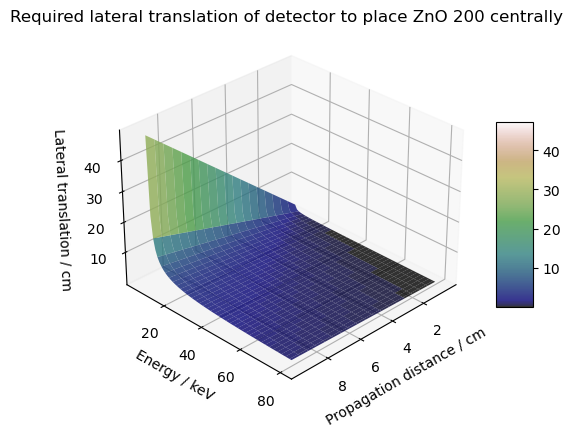

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# speed of light in m/s
c = 3*10**(8)
#Planck's constant in eV s
h=4.136*10**(-15)

# d-spacing in m read from the .txt file
d_spacing = 1.3943*10**(-10)
# assign energy range in eV
eV = np.arange(5000,81000,1000)
# assign different propagation distances in m
z = np.arange(0.005,0.1,0.005)

# generate meshes for the distance and E, 
# such that the xy translation
# can be calculated for all combinations of both

Z, E = np.meshgrid(z, eV)
# compute xy translation by using Bragg's law to 
# determine the scattering angle at each energy.
# lambda=2*d*np.sin(theta)
# use geometric consideration to determine xy
# translation via the tangens of the propagation distance 
# and the scattering angle. Note that a diffraction 
# of an angle 2*theta larger than
# 90 degrees is not possible, we therefore must 
# omit these instances.
theta=np.arcsin((c*h/E)/(2*d_spacing))
XY = np.tan(2*theta)*Z
XY[np.where(np.rad2deg(theta)>45)]=np.nan

# generate surface plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(Z*100,E/1000,XY*100, alpha=0.8, cmap=cm.gist_earth);
plt.xlabel('Propagation distance / cm ')
plt.ylabel('Energy / keV')
ax.set_zlabel('Lateral translation / cm')
plt.title('Required lateral translation of detector to place ZnO 200 centrally')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.view_init(30, 45)
plt.show()